# Setup

In [126]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Sommario dei dati utilizzati

## a. Breve descrizione di ciascun titolo selezionato e motivazione della scelta (per esempio notizie rilevanti, trend osservati eccetera);

## b. Funzioni utilizzate per scaricare i dati da Yahoo! Finance o da altri siti (es. Fama-French).

In [129]:
# defining time period


# 'META', 'MSFT' -> Information Technology: + layoffs
# 'V', 'JPM' -> Financials: https://disfold.com/united-states/sector/financials/companies/
# 'GOOG', 'TMUS' -> Communication Services: https://disfold.com/united-states/sector/communication-services/companies/
colors = {'META': '#056EE7', 'MSFT': '#7cbb00', 'V':'#1734CD', 'JPM':'#301A0E', 'GOOG':'#ea4335', 'TMUS':'#e20074'}

start_date = '2012-11-30'
end_date = '2022-11-30'

tickers = ['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']

stocks = {ticker: yf.download(ticker, start_date, end_date) for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [130]:
# Ho utilizzato un dict (<chiave> -> <valore>) che ha come chiave il Ticker della Stock
# Ciascun <valore> contiene un DataFrame con le informazioni necessarie

stocks

{'META':                                  Open        High         Low       Close  \
 Date                                                                        
 2012-11-30 00:00:00-05:00   27.260000   28.000000   26.760000   28.000000   
 2012-12-03 00:00:00-05:00   28.000000   28.879999   26.980000   27.040001   
 2012-12-04 00:00:00-05:00   27.059999   27.760000   26.680000   27.459999   
 2012-12-05 00:00:00-05:00   27.750000   27.900000   27.260000   27.709999   
 2012-12-06 00:00:00-05:00   27.680000   27.750000   26.820000   26.969999   
 ...                               ...         ...         ...         ...   
 2022-11-22 00:00:00-05:00  109.860001  111.620003  108.320000  111.440002   
 2022-11-23 00:00:00-05:00  111.720001  112.669998  110.730003  112.239998   
 2022-11-25 00:00:00-05:00  111.300003  112.730003  111.019997  111.410004   
 2022-11-28 00:00:00-05:00  110.779999  112.040001  108.379997  108.779999   
 2022-11-29 00:00:00-05:00  109.540001  110.940002  108.

## c. Funzioni utilizzate per la fusione (se necessario) delle serie in un unico DataFrame;

In [131]:
# Creiamo un nuovo DataFrame
df_stocks = pd.DataFrame()

for ticker, single_stock in stocks.items():
  # Aggiungiamo come suffisso il relativo ticker
  single_stock = single_stock.add_suffix(f"_{ticker.upper()}")
  df_stocks = pd.concat([df_stocks,single_stock], axis=1)
  
df_stocks.head()

,Open_META,High_META,Low_META,Close_META,Adj Close_META,Volume_META,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,...,Low_GOOG,Close_GOOG,Adj Close_GOOG,Volume_GOOG,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-30 00:00:00-05:00,27.260000,28.000000,26.76,28.000000,28.000000,127049600,27.049999,27.129999,26.490000,26.620001,...,17.078238,17.394053,17.394053,127018318,20.320000,21.420000,20.320000,21.299999,17.648056,9663150
2012-12-03 00:00:00-05:00,28.000000,28.879999,26.98,27.040001,27.040001,123526100,26.780001,26.820000,26.400000,26.430000,...,17.287951,17.316343,17.316343,88028721,21.360001,21.799999,21.180000,21.540001,17.846910,2333950
2012-12-04 00:00:00-05:00,27.059999,27.760000,26.68,27.459999,27.459999,72869200,26.500000,26.629999,26.340000,26.370001,...,17.078485,17.211239,17.211239,79966615,20.040001,20.240000,19.799999,19.920000,16.504662,8809950
2012-12-05 00:00:00-05:00,27.750000,27.900000,27.26,27.709999,27.709999,58976300,26.379999,26.930000,26.260000,26.670000,...,16.994551,17.131289,17.131289,74775229,19.920000,20.420000,19.799999,20.200001,16.736656,5255250
2012-12-06 00:00:00-05:00,27.680000,27.750000,26.82,26.969999,26.969999,46001500,26.809999,26.980000,26.610001,26.730000,...,17.048847,17.213730,17.213730,58711242,20.360001,20.760000,20.219999,20.740000,17.184071,3973050


## d. Presentazione dei dati con un grafico e le prime righe del DataFrame.

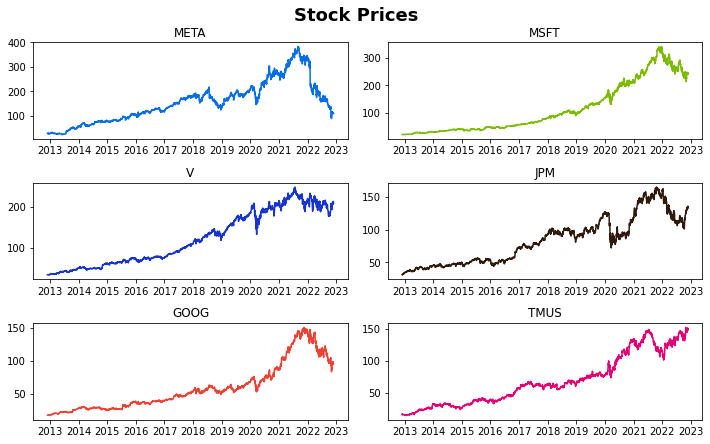

In [132]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs = axs.ravel()

fig.suptitle("Stock Prices", fontweight='bold', fontsize=18, y=1.02)

for i, ticker in enumerate(tickers):
    axs[i].plot(stocks[ticker]['Adj Close'], color = colors[ticker])
    axs[i].set_title(ticker)

plt.tight_layout()
plt.show()

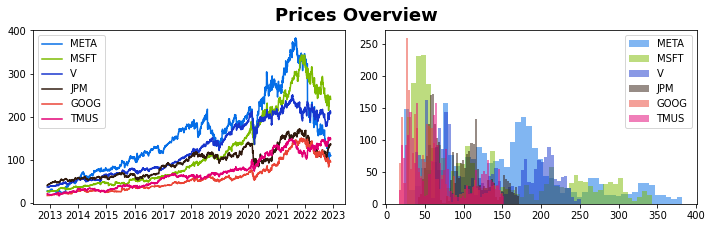

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle("Prices Overview", fontweight='bold', fontsize=18, y=1.04)

for ticker, single_stock in stocks.items():
  ax1.plot(single_stock['Close'], label=ticker, color = colors[ticker])
  ax1.legend()

for ticker, single_stock in stocks.items():
  ax2.hist(single_stock['Close'],label=ticker,bins=50, alpha=0.5, color = colors[ticker])
  ax2.legend()

plt.tight_layout()
plt.show()

In [134]:
df_stocks.head(2)

,Open_META,High_META,Low_META,Close_META,Adj Close_META,Volume_META,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,...,Low_GOOG,Close_GOOG,Adj Close_GOOG,Volume_GOOG,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-30 00:00:00-05:00,27.26,28.000000,26.76,28.000000,28.000000,127049600,27.049999,27.129999,26.49,26.620001,...,17.078238,17.394053,17.394053,127018318,20.320000,21.420000,20.32,21.299999,17.648056,9663150
2012-12-03 00:00:00-05:00,28.00,28.879999,26.98,27.040001,27.040001,123526100,26.780001,26.820000,26.40,26.430000,...,17.287951,17.316343,17.316343,88028721,21.360001,21.799999,21.18,21.540001,17.846910,2333950


# 2. Statistiche descrittive

## a. Calcolare il rendimento cumulato e composto annuo di ciascun titolo nel periodo;

In [135]:
stocks_close = {}

# Per ogni stock ricreiamo un dict contenete solo le Adj Close
for ticker, single_stock in stocks.items():
  stocks_close[ticker] = single_stock["Adj Close"]

# Trasformiamo il dict ad un unico Data Frame
stocks_close = pd.DataFrame(stocks_close)

In [136]:
# Calcoliamo giorno per giorno il Cumulative Return (netto)
df_daily_cum_return = stocks_close.pct_change().dropna().add(1).cumprod() - 1

In [137]:
# Calcoliamo giorno per giorno il Cumulative Return (netto)
df_daily_comp_return =  df_daily_cum_return **(1/10)

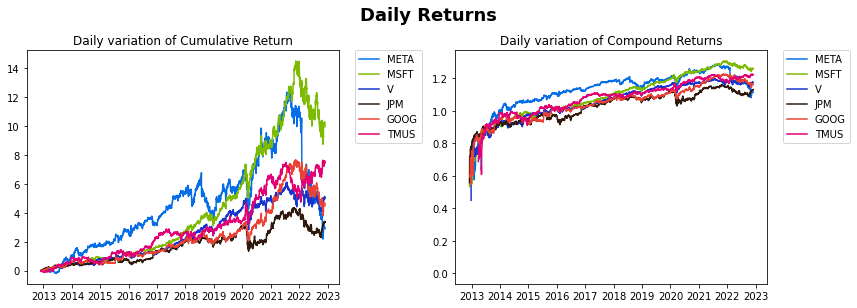

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Daily Returns", fontweight='bold', fontsize=18, y=1.06)

# Mostriamo l'andamento giornaliero del Cumulative Return
for ticker in df_daily_cum_return:
  ax1.plot(df_daily_cum_return[ticker], color = colors[ticker]);
  ax1.set_title('Daily variation of Cumulative Return');
  ax1.legend(df_daily_cum_return, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo l'andamento giornaliero del Compound Return
for ticker in df_daily_comp_return:
  ax2.plot(df_daily_comp_return[ticker], color = colors[ticker]);
  ax2.set_title('Daily variation of Compound Returns');
  ax2.legend(df_daily_comp_return, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [139]:
cum_returns = {}
comp_returns = {}

for ticker, single_stock in stocks_close.items():
  init_price = stocks_close[ticker][0]
  final_price = stocks_close[ticker][-1]

  # Calcolare il Cumulative Return (netto) Totale
  cum_returns[ticker] = (final_price/init_price) -1
  comp_returns[ticker] = cum_returns[ticker]**(1/10)

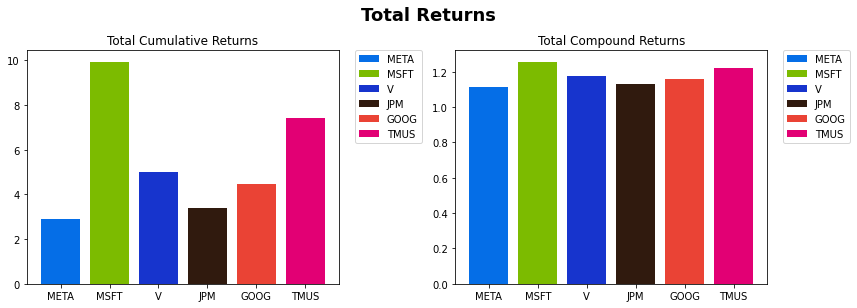

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Total Returns", fontweight='bold', fontsize=18, y=1.06)

for ticker, single_return in cum_returns.items():
  ax1.bar(ticker, single_return, label=ticker, color = colors[ticker])
  ax1.set_title('Total Cumulative Returns')
  ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for ticker, single_return in comp_returns.items():
  ax2.bar(ticker, single_return,label=ticker, color = colors[ticker])
  ax2.set_title('Total Compound Returns')
  ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

## b. Calcolare i rendimenti semplici e logaritmici e visualizzarli in un grafico;

In [141]:
# Calcoliamo i rendimenti semplici
simple_returns = stocks_close.pct_change().dropna()
yearly_simple_returns = simple_returns.groupby(pd.Grouper(freq='Q')).mean()

In [142]:
# Calcoliamo i rendimenti semplici
log_returns = np.log(stocks_close/stocks_close.shift(1)).dropna()
yearly_log_returns = log_returns.groupby(pd.Grouper(freq='Q')).mean()

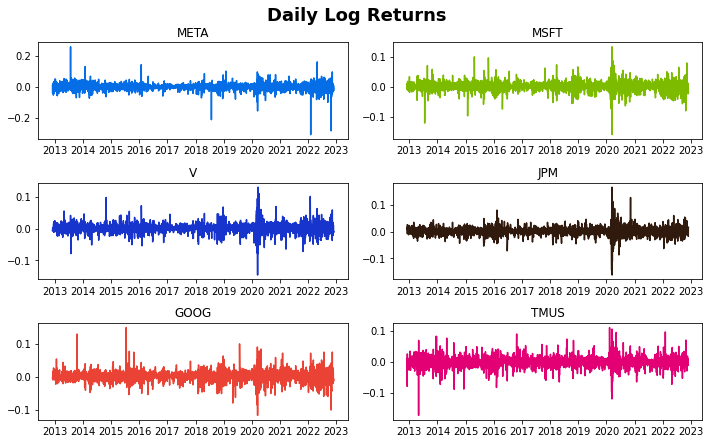

In [143]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs = axs.ravel()

fig.suptitle("Daily Log Returns", fontweight='bold', fontsize=18, y=1.02)

for i, ticker in enumerate(tickers):
    axs[i].plot(log_returns[ticker], color = colors[ticker])
    axs[i].set_title(ticker)

plt.tight_layout()
plt.show()

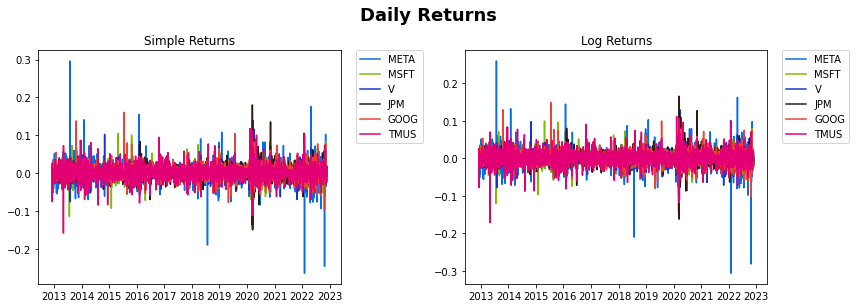

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Daily Returns", fontweight='bold', fontsize=18, y=1.06)

# Mostriamo l'andamento annuale del Simple Returns
for ticker in simple_returns:
  ax1.plot(simple_returns[ticker], color = colors[ticker]);
  ax1.set_title('Simple Returns');
  ax1.legend(simple_returns, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo l'andamento annuale dei Log Returns
for ticker in log_returns:
  ax2.plot(log_returns[ticker], color = colors[ticker]);
  ax2.set_title('Log Returns');
  ax2.legend(log_returns, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

## c. Commentare:
- i. che cosa hanno in comune le serie storiche?
- ii. c’è una correlazione positiva fra società dello stesso settore
- iii. ci sono momenti di rendimenti molto lontani dalla media? Se sì cercate le
notizie che potrebbero spiegarli.

## d. Presentare i rendimenti con istogrammi e confrontare la dispersione dei rendimenti dei diversi titoli

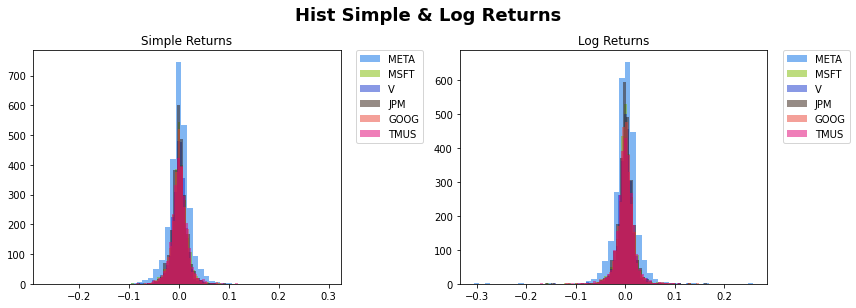

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Hist Simple & Log Returns", fontweight='bold', fontsize=18, y=1.06)

# Istogramma dei Simple Returns giornalieri
for ticker in simple_returns:
  ax1.hist(simple_returns[ticker], label=ticker,bins=50, alpha=0.5, color = colors[ticker]);
  ax1.set_title('Simple Returns');
  ax1.legend(simple_returns, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Istogramma dei Log Returns giornalieri
for ticker in log_returns:
  ax2.hist(log_returns[ticker], label=ticker,bins=50, alpha=0.5, color = colors[ticker]);
  ax2.set_title('Log Returns');
  ax2.legend(log_returns, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

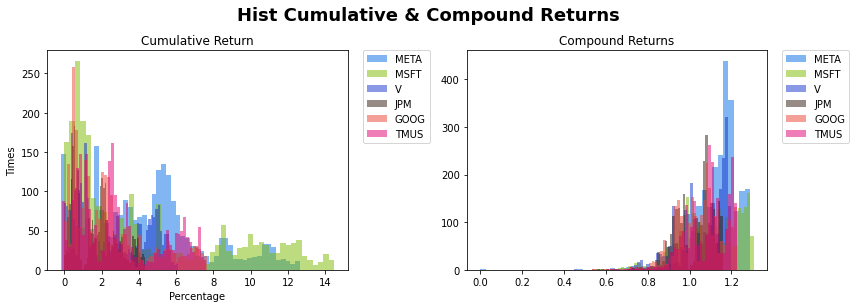

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Hist Cumulative & Compound Returns", fontweight='bold', fontsize=18, y=1.06)

# Istogramma dei Cumulative Returns giornalieri
for ticker in df_daily_cum_return:
  ax1.hist(df_daily_cum_return[ticker], label=ticker,bins=50, alpha=0.5, color = colors[ticker]);
  ax1.set_title('Cumulative Return');
  ax1.legend(df_daily_cum_return, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  ax1.set_xlabel("Percentage")
  ax1.set_ylabel("Times")

# Istogramma dei Compound Returns giornalieri
for ticker in df_daily_comp_return:
  ax2.hist(df_daily_comp_return[ticker], label=ticker,bins=50, alpha=0.5, color = colors[ticker]);
  ax2.set_title('Compound Returns');
  ax2.legend(df_daily_comp_return, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

##e. Creare grafici diagnostici a 3 sezioni (istogramma e kernel density, boxplot, qq-plot) per ciascuna serie di rendimenti e commentare (i rendimenti sono distribuiti normalmente? Ci sono outliers?)

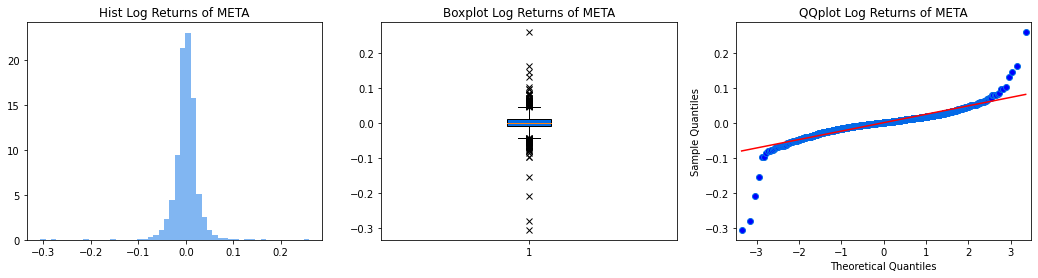

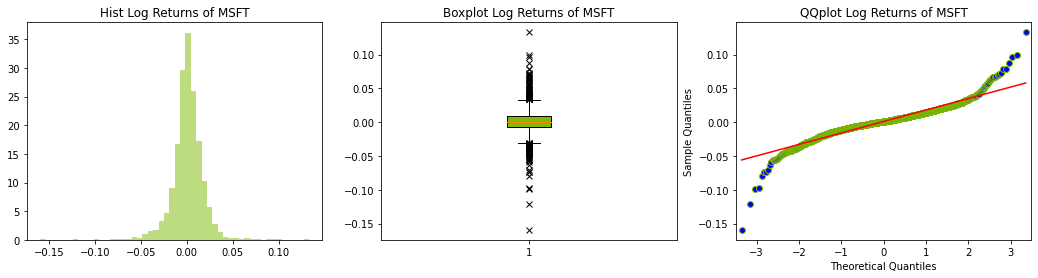

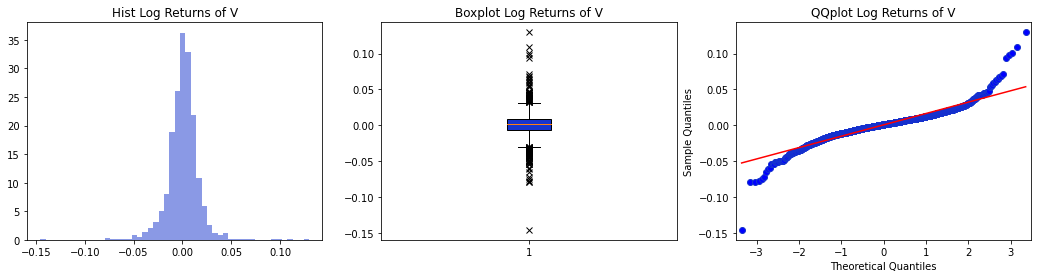

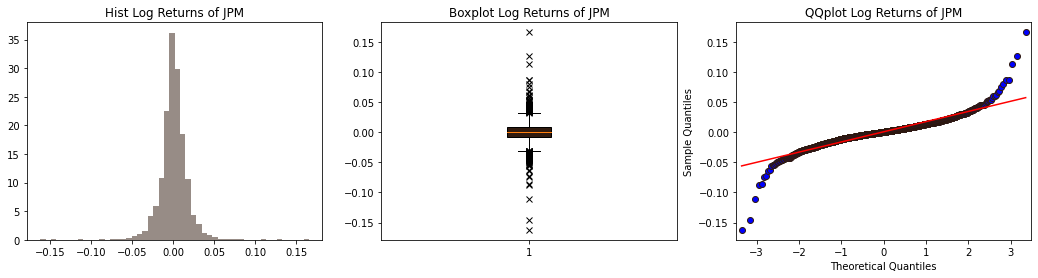

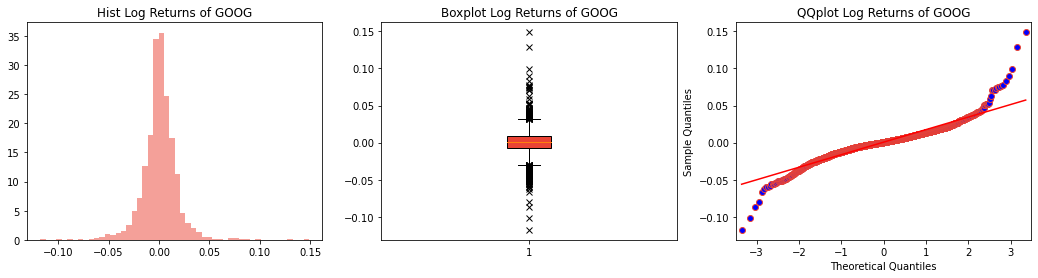

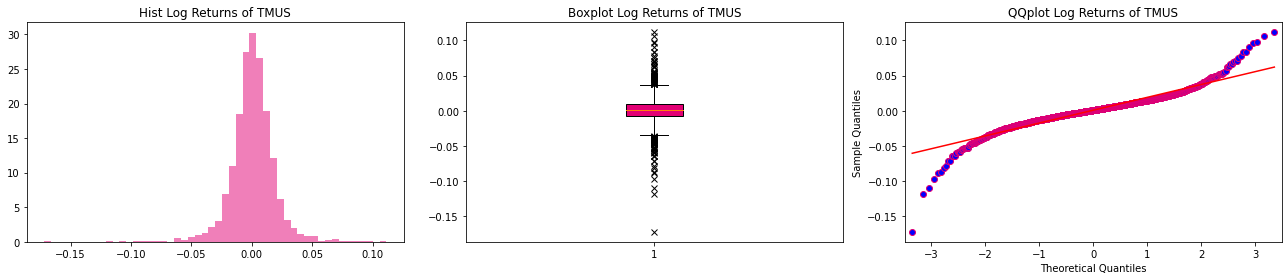

In [148]:
import statsmodels.api as sm

# Istogramma dei Log Returns giornalieri
for ticker in log_returns:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

  ax1.hist(log_returns[ticker], label=ticker,bins=50, alpha=0.5, color = colors[ticker], density=True);
  ax1.set_title(f"Hist Log Returns of {ticker}");

  # Boxplot dei Log Returns giornalieri
  bp = ax2.boxplot(log_returns[ticker], sym = 'x', patch_artist=True)
  ax2.set_title(f"Boxplot Log Returns of {ticker}");
  for patch in bp['boxes']:
    patch.set_facecolor(colors[ticker])

  # QQplot dei Log Returns giornalieri
  sm.qqplot(log_returns[ticker], line='s', color=colors[ticker], ax=ax3)
  ax3.set_title(f"QQplot Log Returns of {ticker}");

plt.tight_layout()
plt.show()

##f. Calcolare statistiche descrittive univariate (media, varianza, deviazione standard, asimmetria, curtosi) per ogni serie di rendimenti e commentare.
- i. Quali azioni hanno il rendimento più basso e più alto?
- ii. quali azioni hanno la deviazione standard più alta o più bassa?
- iii. come si evolvono nel tempo rendimento e volatilità?
- iv. quale azione ha la distribuzione di rendimenti più vicina o lontana dalla
normale?

In [149]:
df_yearly_cum_return = df_daily_cum_return.groupby(pd.Grouper(freq='Y')).last()
desc_stats = df_yearly_cum_return.describe()

desc_stats.loc['asymmetry'] = round(df_yearly_cum_return.skew(), 4)
desc_stats.loc['curtosi'] = round(df_yearly_cum_return.kurtosis(), 4)
desc_stats

,META,MSFT,V,JPM,GOOG,TMUS
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,4.229773,4.485790,2.546398,1.840301,2.381404,3.011111
std,3.355645,4.676936,2.016171,1.318332,2.170683,2.521294
min,-0.049286,0.003380,0.012491,0.070350,0.012901,-0.066667
25%,2.262143,1.056509,0.948590,0.675486,0.893093,1.061417
50%,3.108929,2.669880,2.161077,1.775258,1.976908,2.598697
75%,5.816250,7.470040,4.633546,2.973667,3.439592,4.507689
max,11.012500,14.179781,5.181436,3.931716,7.317757,7.421324
asymmetry,0.905400,1.073100,0.296500,0.233800,1.259200,0.688800
curtosi,0.247500,0.109200,-1.768100,-1.400200,1.437300,-0.749700


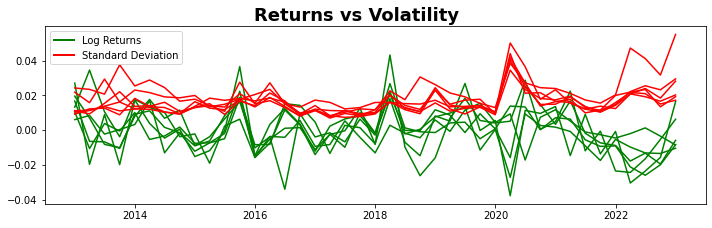

In [279]:
from matplotlib.lines import Line2D 

quarterly_last = log_returns.groupby(pd.Grouper(freq='Q')).last()
quarterly_std = log_returns.groupby(pd.Grouper(freq='Q')).std()

fig, ax1 = plt.subplots(figsize=(10, 3))
fig.suptitle("Returns vs Volatility", fontweight='bold', fontsize=18, y=1.04)

labels_set = set()
lines = []

line = ax1.plot(quarterly_last, color='green', label='Log Returns')
if 'Log Returns' not in labels_set:
    lines.extend(line)
    labels_set.add('Log Returns')

line = ax1.plot(quarterly_std, color='red', label='Standard Deviation')
if 'Standard Deviation' not in labels_set:
    lines.extend(line)
    labels_set.add('Standard Deviation')

legend_elements = [Line2D([0], [0], color='green', lw=2, label='Log Returns'),
                   Line2D([0], [0], color='red', lw=2, label='Standard Deviation')]
ax1.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()


## g. Calcolare la matrice di varianze/covarianze e di correlazione dei rendimenti. Sulla base della matrice di correlazioni: 
- i. Quali sono i titoli più correlati?
- ii. Quali i meno correlati?

In [151]:
df_monthly_cum_return = df_daily_cum_return.groupby(pd.Grouper(freq='M')).last()
df_monthly_cum_return

,META,MSFT,V,JPM,GOOG,TMUS
Date,,,,,,
2012-12-31 00:00:00-05:00,-0.049286,0.003380,0.012491,0.070350,0.012901,-0.066667
2013-01-31 00:00:00-05:00,0.106429,0.031180,0.054773,0.153194,0.082077,-0.058216
2013-02-28 00:00:00-05:00,-0.026786,0.052974,0.061883,0.199027,0.147243,-0.079812
2013-03-31 00:00:00-04:00,-0.086429,0.083654,0.136852,0.163243,0.137205,0.023474
2013-04-30 00:00:00-04:00,-0.008214,0.253720,0.127616,0.208745,0.180707,0.111737
...,...,...,...,...,...,...
2022-07-31 00:00:00-04:00,4.682143,11.726955,5.052524,2.673352,5.705740,7.106275
2022-08-31 00:00:00-04:00,4.818928,10.878535,4.680200,2.621449,5.275133,7.157273
2022-09-30 00:00:00-04:00,3.845714,9.580605,4.078191,2.327543,4.527752,6.602537


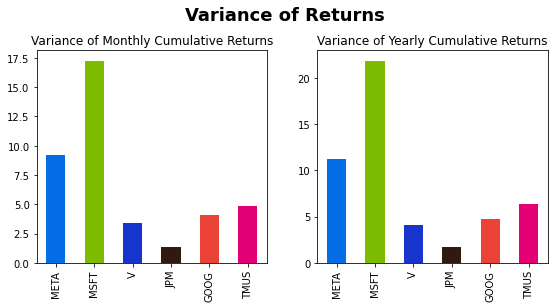

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Variance of Returns", fontweight='bold', fontsize=18, y=1.06)

# Heatmap Varianza dei Cumulative Returns Mensili
df_monthly_cum_return.var().plot(kind='bar', figsize=(8, 4), color=[colors[ticker] for ticker in tickers], ax=ax1);
ax1.set_title("Variance of Monthly Cumulative Returns")

# Heatmap Varianza dei Cumulative Returns Annuali
df_yearly_cum_return.var().plot(kind='bar', figsize=(8, 4), color=[colors[ticker] for ticker in tickers], ax=ax2);
plt.title('Variance of Yearly Cumulative Returns');
ax2.set_title("Variance of Yearly Cumulative Returns")

plt.tight_layout()
plt.show()

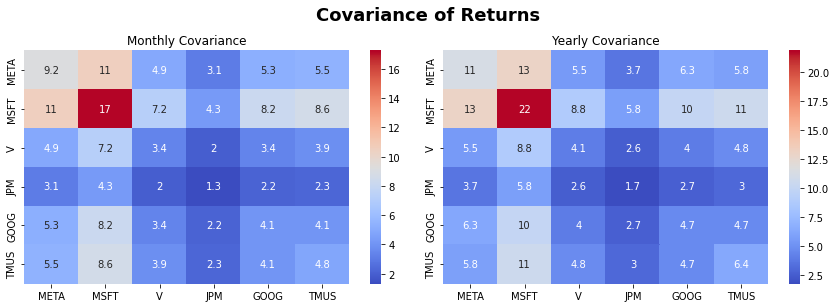

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Covariance of Returns", fontweight='bold', fontsize=18, y=1.06)

# Heatmap Covarianza dei Cumulative Returns Mensili
sns.heatmap(df_monthly_cum_return.cov(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Monthly Covariance")

# Heatmap Covarianza dei Cumulative Returns Annuali
sns.heatmap(df_yearly_cum_return.cov(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title("Yearly Covariance")

plt.tight_layout()
plt.show()

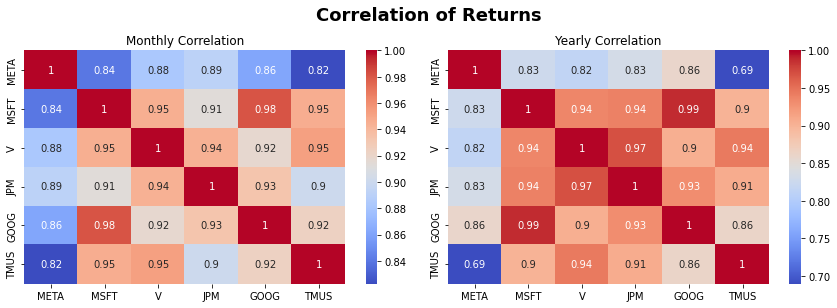

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Correlation of Returns", fontweight='bold', fontsize=18, y=1.06)

# Heatmap Correlazione dei Cumulative Returns Mensili
sns.heatmap(df_monthly_cum_return.corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Monthly Correlation")

# Heatmap Correlazione dei Cumulative Returns Annuali
sns.heatmap(df_yearly_cum_return.corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title("Yearly Correlation")

plt.tight_layout()
plt.show()

## h. Fare il grafico dell’andamento nel tempo delle correlazioni fra i titoli e i grafici di dispersione (scatter plots) delle correlazioni medie.
- i. Commentare le relazioni e il loro andamento nel tempo;
- ii. Come cambia la correlazione fra le azioni nel tempo?
- iii. Come cambiano le correlazioni in funzione dei rendimenti?
- iv. La dispersione dei punti negli scatter plot conferma o no la relazione lineare fra
i due rendimenti?

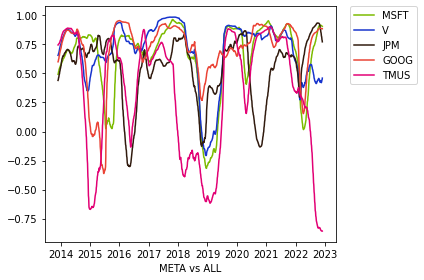

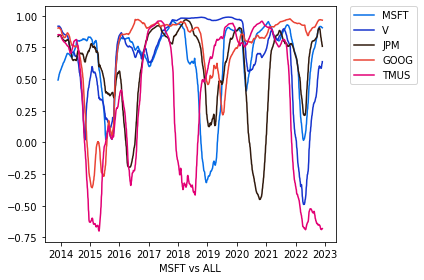

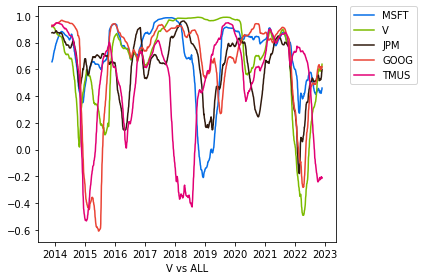

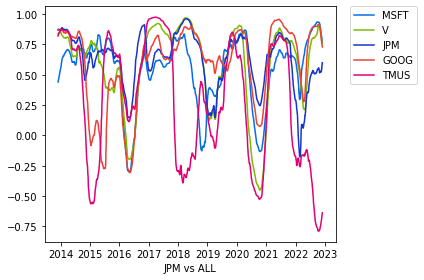

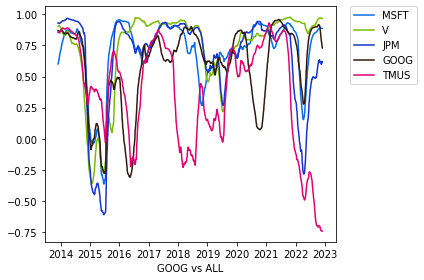

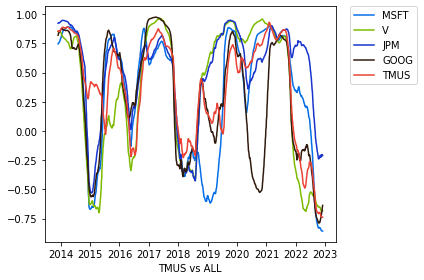

In [155]:
for j in range(stocks_close.shape[1]):
  for i in range(stocks_close.shape[1]):
    if (i != j):
      first_stock = stocks_close.iloc[:, j]
      second_stock = stocks_close.iloc[:, i]

      corr_plot = first_stock.rolling(252).corr(second_stock).dropna()

      plt.plot(corr_plot, color=list(colors.values())[i])
      plt.xlabel(f"{first_stock.name} vs ALL")
      plt.tight_layout()
      plt.legend(tickers[1:], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

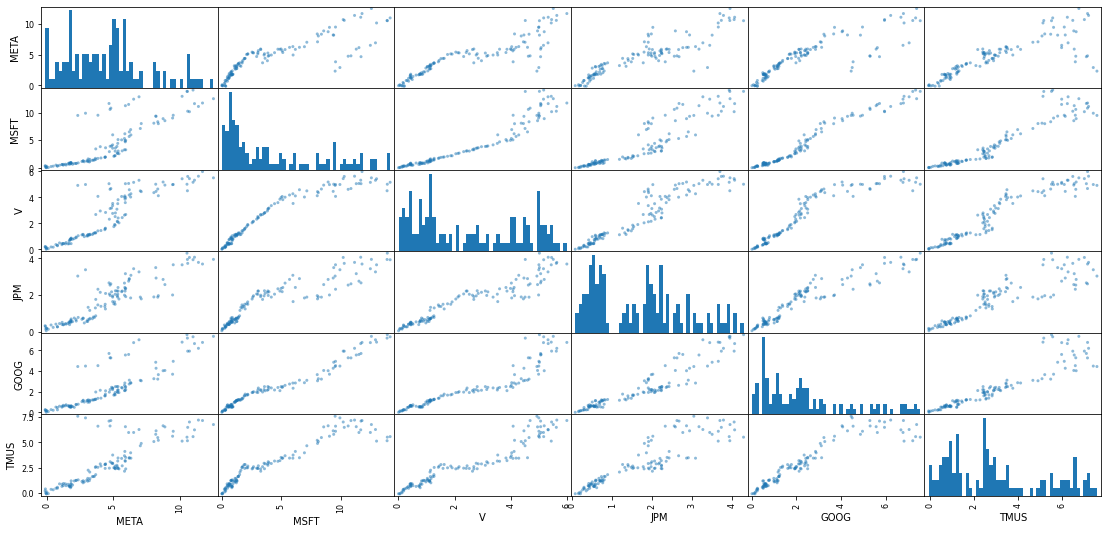

In [156]:
pd.plotting.scatter_matrix(df_monthly_cum_return, alpha=0.5,
                           diagonal = 'hist',
                           hist_kwds={'bins': 50},
                           figsize = (19,9), grid = True);

# 3. Analisi di previsione

## a. Costruire un modello di previsione (ARIMA, SVM o altro) per prevedere i prezzi o rendimenti di ciascun strumento finanziario, usando:
- i. n (80) mesi come training set
- ii. m (30) mesi come validation set
- iii. l (10) mesi per il test.
- iv. Utilizzare gli ultimi (10) mesi per confrontare le previsioni con i valori effettivi

In [158]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [159]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.12.2-cp38-cp38-manylinux1_x86_64.whl (9.4 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.2 requires statsmodels>=0.13.2, but you have statsmodels 0.12.2 which is incompatible.


In [160]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

In [161]:
single_ticker = 'META'
monthly_stocks_close = stocks_close[single_ticker].groupby(pd.Grouper(freq='M')).last()

train_data = monthly_stocks_close[:81].tz_localize(None) 
test_data = monthly_stocks_close[80:111].tz_localize(None) 
to_predict = monthly_stocks_close[110:120].tz_localize(None) 

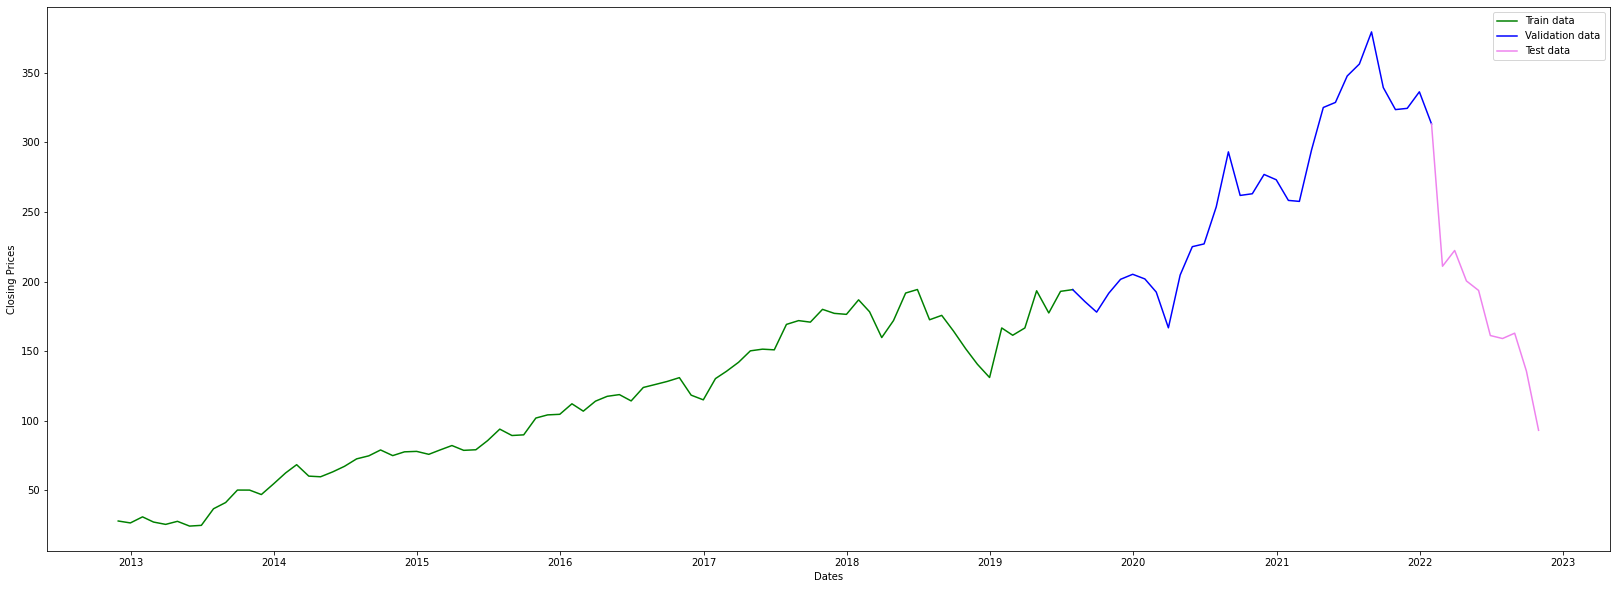

In [162]:
plt.figure(figsize=(28,10))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, "green", label="Train data")
plt.plot(test_data, 'blue', label='Validation data')
plt.plot(to_predict, 'violet', label='Test data')
plt.legend()

## Auto ARIMA

In [163]:
def perform_auto_arima(train_data):
  model_autoARIMA = auto_arima(train_data, 
                              seasonal=False,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)
  return model_autoARIMA

In [164]:
def evaluate_arima(train_data, i_order, num, test_data):
  model = ARIMA(train_data, order=i_order)
  fitted = model.fit()
  
  fc, se, conf = fitted.forecast(num, alpha=0.05)
  fc_series = pd.Series(fc, index=test_data.index)

  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)

  return fc_series, lower_series, upper_series

In [165]:
def plot_predictions(train_data, test_data, fc_series):
  ticker = train_data.name

  plt.figure(figsize=(8,3), dpi=100)
  plt.plot(train_data, color = colors[ticker], label='Training')
  plt.plot(test_data, color = 'darkgreen', label='Test')
  plt.plot(fc_series, color = 'orange', label='Predicted')
  plt.fill_between(lower_series.index, lower_series, upper_series, color='k',alpha=.05)
  plt.title(f"{ticker} Stock Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()

In [166]:
model_autoARIMA = perform_auto_arima(train_data)
best_order = model_autoARIMA.fit(train_data).order
num = test_data.shape[0]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=582.290, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=583.043, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=582.526, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=584.459, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.968 seconds


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be use

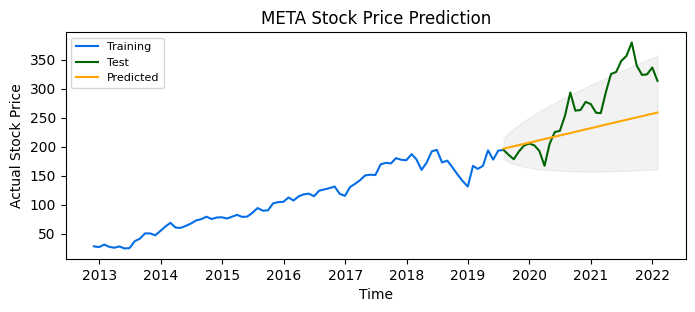

In [167]:
fc_series, lower_series, upper_series = evaluate_arima(train_data, best_order, num, test_data)
plot_predictions(train_data, test_data, fc_series)

### Predicting 10 months

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

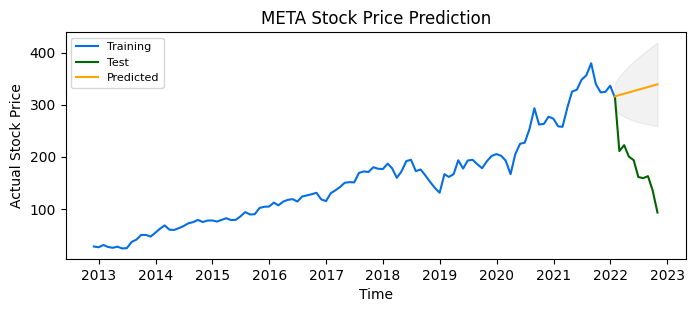

In [168]:
unified_data = train_data.append(test_data)
num = 10

fc_series, lower_series, upper_series = evaluate_arima(unified_data, best_order, num, to_predict)
plot_predictions(unified_data, to_predict, fc_series)

## ARIMA with Grid Search

In [169]:
# Grid Search for ARIMA Model
# Change p,d and q and check for the best result

# Evaluate an ARIMA model for a given order (p,d,q)
# Assuming that the train and Test Data is already defined before
def evaluate_arima_mse(train_data, i_order, num, test_data):
  model = ARIMA(train_data, order=i_order)
  fitted = model.fit(disp=-1)

  fc = fitted.forecast(num, alpha=0.05)[0]
  fc_series = pd.Series(fc, index=test_data.index)
  
  return mean_squared_error(test_data, fc_series)

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values, train_data, test_data, num): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)             
                try:
                    mse = evaluate_arima_mse(train_data, order, num, test_data)
                    # print(mse)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    return best_cfg

In [170]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
num = 31

best_order = evaluate_models(p_values, d_values, q_values, train_data, test_data, num)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be use

ARIMA(0, 0, 0) MSE=27049.3028206
ARIMA(0, 0, 1) MSE=26933.3555471
ARIMA(0, 1, 0) MSE=3303.4836371
ARIMA(0, 1, 1) MSE=3307.5655626
ARIMA(1, 0, 0) MSE=10700.3324852
ARIMA(1, 0, 1) MSE=10366.9069282
ARIMA(1, 1, 0) MSE=3285.7528377
ARIMA(1, 1, 1) MSE=3041.4238847


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be use

ARIMA(2, 0, 0) MSE=10424.6241878
ARIMA(2, 0, 1) MSE=11468.2492777
ARIMA(2, 1, 0) MSE=3450.6677240


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be use

ARIMA(2, 1, 1) MSE=3668.5074121
Best ARIMA(1, 1, 1) MSE=3041.4238847


### Predicting 10 months

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

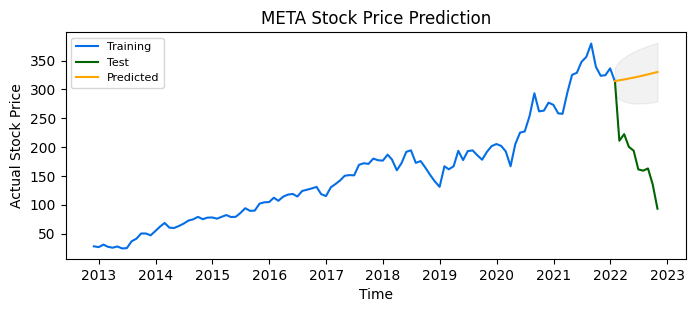

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

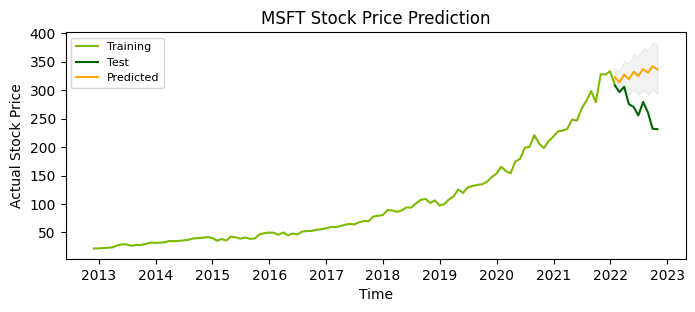

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

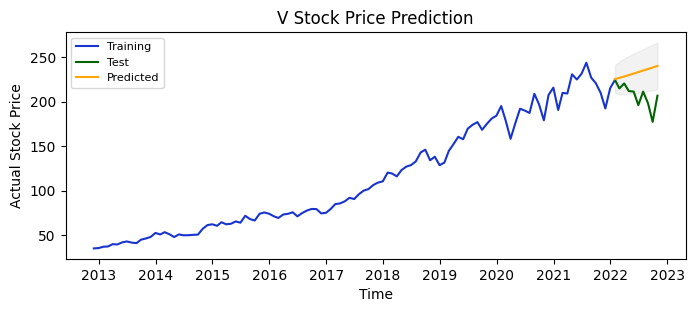

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

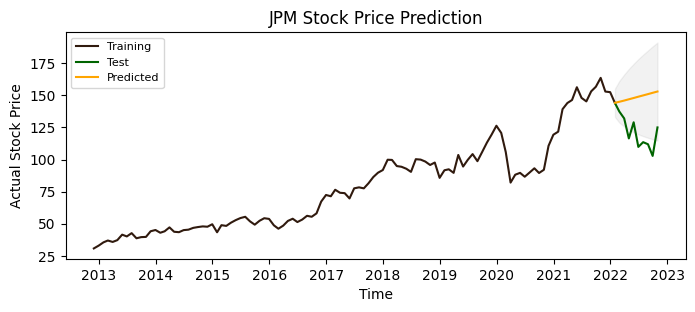

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

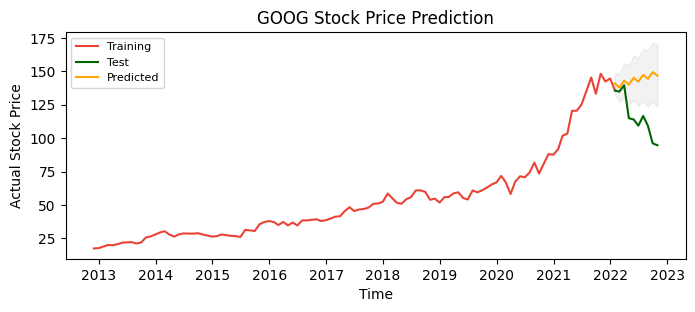

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

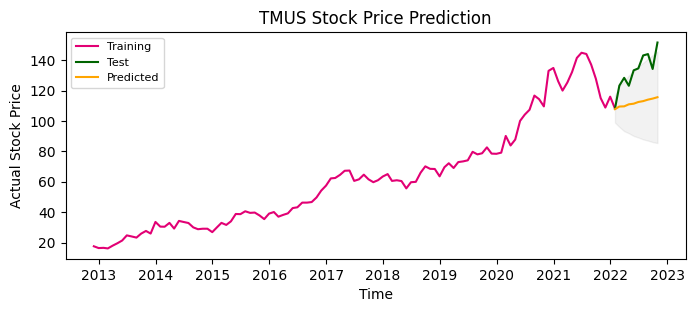

In [171]:
num = 10

for ticker in tickers:
  monthly_stocks_close = stocks_close[ticker].groupby(pd.Grouper(freq='M')).last()

  train_data = monthly_stocks_close[:81].tz_localize(None) 
  test_data = monthly_stocks_close[80:111].tz_localize(None) 
  to_predict = monthly_stocks_close[110:120].tz_localize(None) 

  unified_data = train_data.append(test_data)

  fc_series, lower_series, upper_series = evaluate_arima(unified_data, best_order, num, to_predict)
  plot_predictions(unified_data, to_predict, fc_series)

# 4. Stategie di trading e backtesting

## a. Costruire una strategia di trading basata su un algoritmo a scelta che segnali l’acquisto o la vendita di un titolo o indice di borsa e farne il backtesting

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


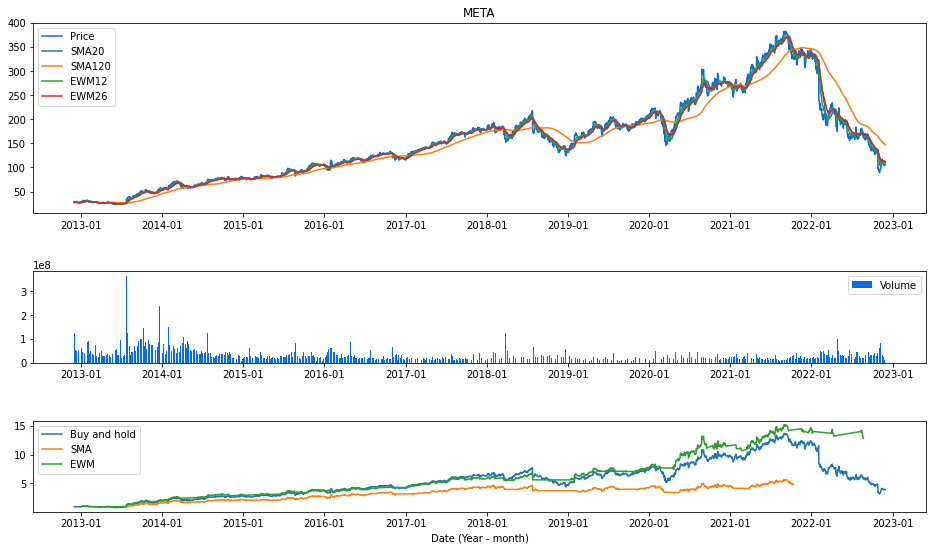

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


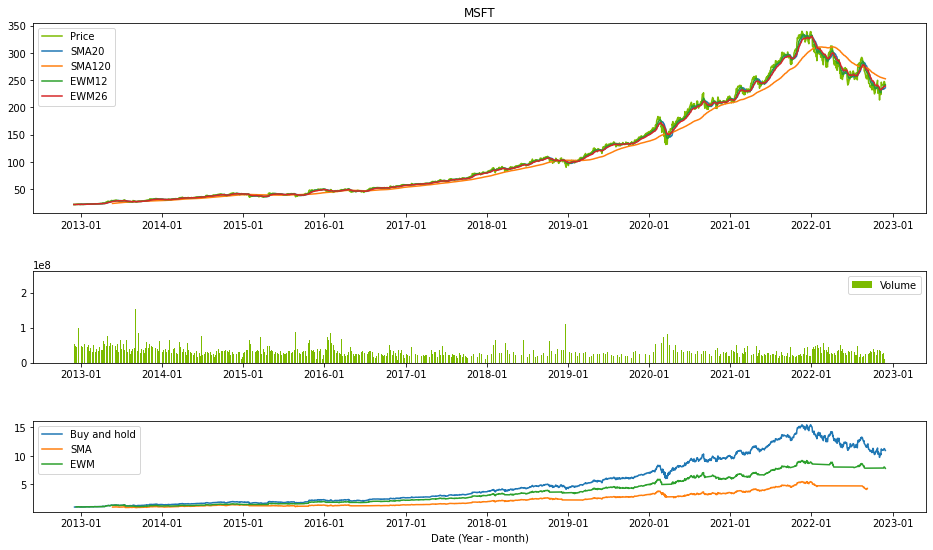

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


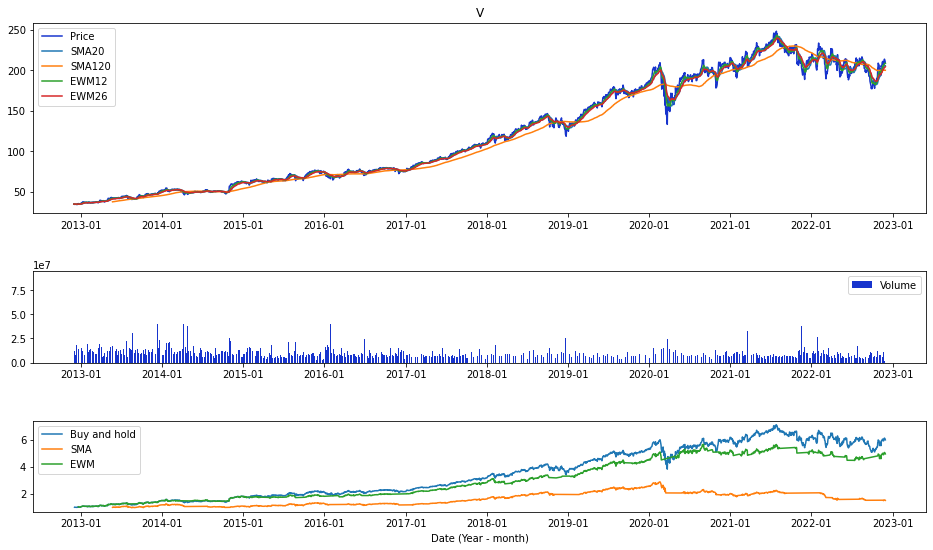

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


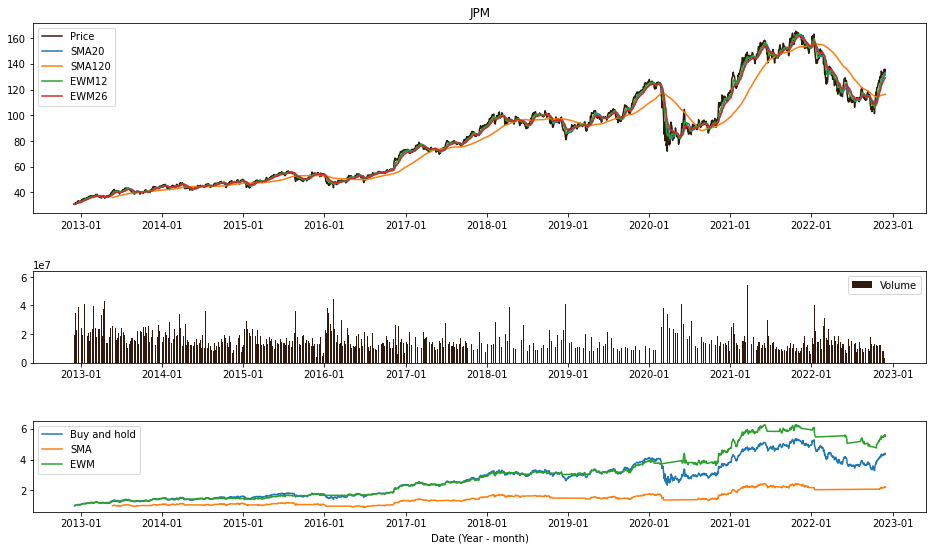

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


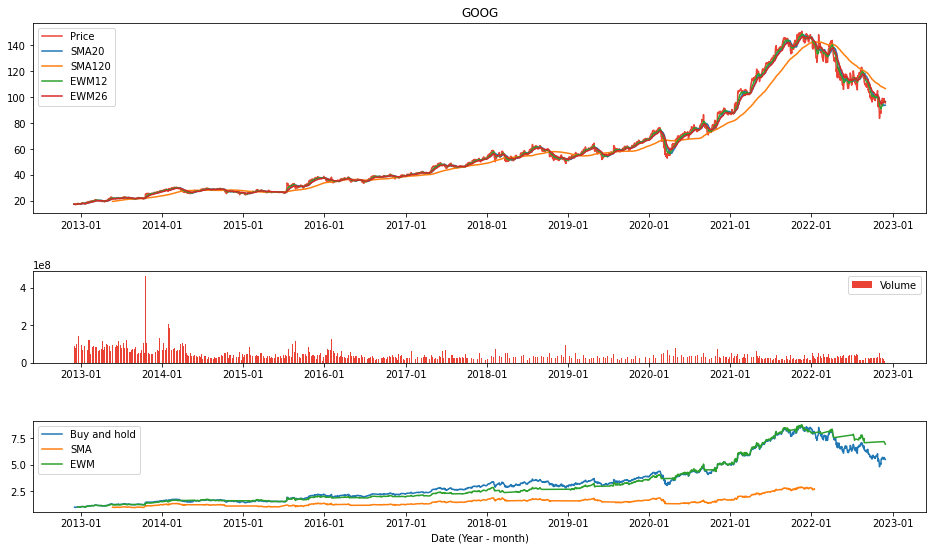

[*********************100%***********************]  1 of 1 completed


<ipython-input-172-7b8a0cadb57e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
<ipython-input-172-7b8a0cadb57e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


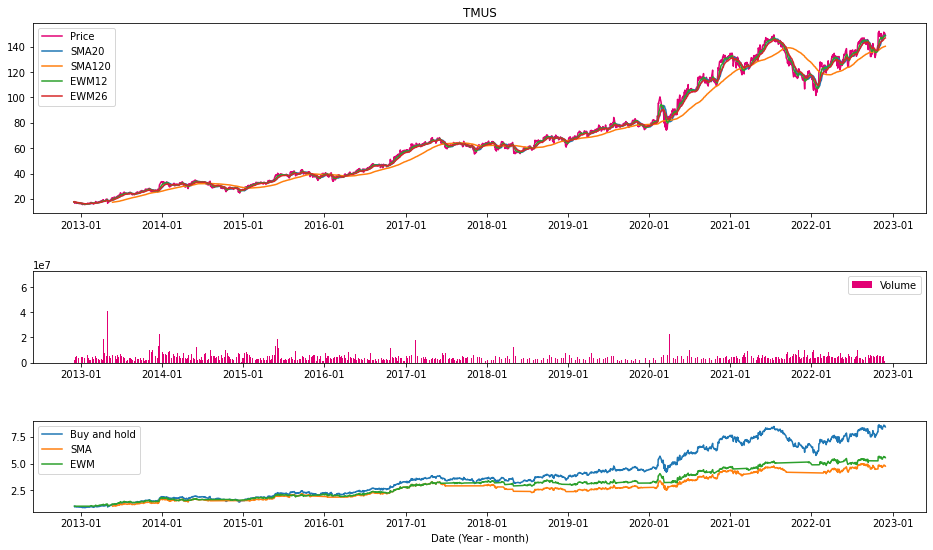

In [172]:
stats = {}

import matplotlib.dates as mdates

for ticker in tickers:
    data =  yf.download(ticker, start_date, end_date)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

    data['SMA20'] = data['Adj Close'].rolling(20).mean()
    data['SMA120'] = data['Adj Close'].rolling(120).mean()

    data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()

    data['Price_yesterday'] = data['Adj Close'].shift(1)
    data['Change'] = data['Adj Close'] / data['Price_yesterday']

    data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data['Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]

    data['Buy_and_hold'] = np.cumprod(data['Change'])

    sma = data[data['Invested_SMA'] == 1]
    sma['Return'] = np.cumprod(sma['Change'])

    ewm = data[data['Invested_EWM'] == 1]
    ewm['Return'] = np.cumprod(ewm['Change'])

    # print(' # Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
    # print(' # SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
    # print(' # EWM return: ' + ticker + ' ' + str(ewm['Return'][-1]))

    stats[ticker] = pd.Series({'Buy and hold strategy return': data['Buy_and_hold'][-1],
                               'SMA return': sma['Return'][-1],
                               'EWM return': ewm['Return'][-1]})

    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax1.plot(data['Adj Close'], label = 'Price', color=colors[ticker])
    ax1.plot(data['SMA20'], label = 'SMA20')
    ax1.plot(data['SMA120'], label = 'SMA120')
    ax1.plot(data['EWM12'], label = 'EWM12')
    ax1.plot(data['EWM26'], label = 'EWM26')

    ax2.bar(data.index, data['Volume'], label = 'Volume', color=colors[ticker])
    ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
    ax3.plot(sma['Return'], label = 'SMA')
    ax3.plot(ewm['Return'], label ='EWM')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax3.set_xlabel('Date (Year - month)')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.show()

## b. Misurare l’efficienza della strategia rispetto alla detenzione del titolo per tutto il periodo (“Buy & Hold”);

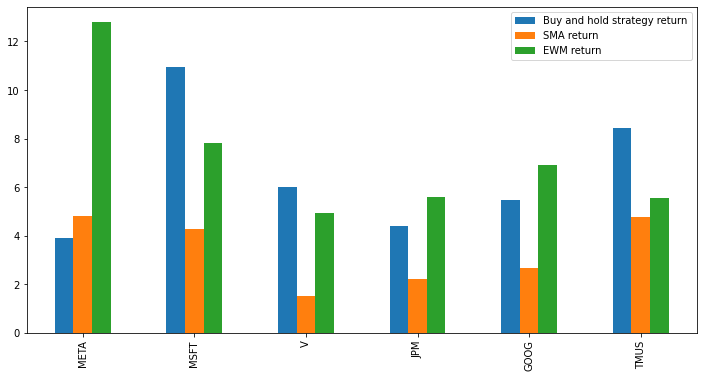

In [173]:
pd.DataFrame(stats).T.plot(kind='bar', figsize=(12,6));

# 5. CAPM

## a. Calcolare il beta di ciascun titolo rispetto al mercato (indice S&P 500, ticker Yahoo Finance ^GSPC)

In [174]:
# defining time period
start_date = '2012-11-30'
end_date = '2022-11-30'

risky_asset = tickers
colors['^GSPC'] = '#002868'
market_benchmark = '^GSPC' # S&P 500
tickers.append(market_benchmark)

df = yf.download(tickers, start_date, end_date).tz_localize(None) 

[*********************100%***********************]  7 of 7 completed


In [175]:
df.head()

Adj Close                                                         \
                 GOOG        JPM       META       MSFT       TMUS          V   
Date                                                                           
2012-11-30  17.394053  30.897844  28.000000  21.950111  17.648056  34.904900   
2012-12-03  17.316343  30.694763  27.040001  21.793444  17.846910  34.655441   
2012-12-04  17.211239  30.514261  27.459999  21.743969  16.504662  34.410614   
2012-12-05  17.131289  30.988102  27.709999  21.991343  16.736656  34.520206   
2012-12-06  17.213730  31.191177  26.969999  22.040815  17.184071  34.615795   

                             Close                        ...       Open  \
                  ^GSPC       GOOG        JPM       META  ...       TMUS   
Date                                                      ...              
2012-11-30  1416.180054  17.394053  41.080002  28.000000  ...  20.320000   
2012-12-03  1409.459961  17.316343  40.810001  27.040001  ...  21.360001   
2012-12-04  1407.050049  17.211239  40.570000  27.459999  ...  20.040001   
2012-12-05  1409.280029  17.131289  41.200001  27.709999  ...  19.920000   
2012-12-06  1413.939941  17.213730  41.470001  26.969999  ...  20.360001   

                                       Volume                                 \
                    V        ^GSPC       GOOG       JPM       META      MSFT   
Date                                                                           
2012-11-30  37.080002  1415.949951  127018318  20066600  127049600  83690200   
2012-12-03  37.500000  1416.339966   88028721  18955500  123526100  53173800   
2012-12-04  37.244999  1409.459961   79966615  24031100   72869200  49777500   
2012-12-05  37.127499  1407.050049   74775229  25515600   58976300  68283800   
2012-12-06  37.112499  1409.430054   58711242  20541700   46001500  39182300   

                                           
               TMUS         V       ^GSPC  
Date                                       
2012-11-30  9663150  14048000  3966000000  
2012-12-03  2333950  11736800  3074280000  
2012-12-04  8809950   9100800  3247710000  
2012-12-05  5255250  11971200  4253920000  
2012-12-06  3973050   9124000  3229700000  

[5 rows x 42 columns]

In [176]:
X = df['Adj Close'].rename(columns={market_benchmark:'market'}).resample('M').last().pct_change().dropna()

In [177]:
X.head()

,GOOG,JPM,META,MSFT,TMUS,V,market
Date,,,,,,,
2012-12-31,0.012901,0.070350,-0.049286,0.003381,-0.066667,0.012491,0.007068
2013-01-31,0.068294,0.077399,0.163787,0.027705,0.009054,0.041760,0.050428
2013-02-28,0.060223,0.039745,-0.120400,0.021135,-0.022931,0.006741,0.011061
2013-03-31,-0.008749,-0.029844,-0.061284,0.029137,0.112245,0.070600,0.035988
2013-04-30,0.038253,0.039116,0.085614,0.156938,0.086239,-0.008125,0.018086


In [178]:
X.cov()

,GOOG,JPM,META,MSFT,TMUS,V,market
GOOG,0.004140,0.001827,0.002792,0.002381,0.001030,0.001974,0.001807
JPM,0.001827,0.004782,0.001267,0.001706,0.000957,0.001869,0.002050
META,0.002792,0.001267,0.010445,0.001616,0.000523,0.001687,0.001897
MSFT,0.002381,0.001706,0.001616,0.003668,0.000510,0.001644,0.001654
TMUS,0.001030,0.000957,0.000523,0.000510,0.005004,0.001666,0.000877
V,0.001974,0.001869,0.001687,0.001644,0.001666,0.003360,0.001691
market,0.001807,0.002050,0.001897,0.001654,0.000877,0.001691,0.001760


In [179]:
risky_asset_cov = X.cov().iloc[-1, :6]
risky_asset_cov

GOOG    0.001807
JPM     0.002050
META    0.001897
MSFT    0.001654
TMUS    0.000877
V       0.001691
Name: market, dtype: float64

In [180]:
benchmark_variance = X.market.var()
benchmark_variance

0.0017602510433021078

In [181]:
betas = risky_asset_cov / benchmark_variance
betas

GOOG    1.026771
JPM     1.164685
META    1.077908
MSFT    0.939851
TMUS    0.498480
V       0.960531
Name: market, dtype: float64

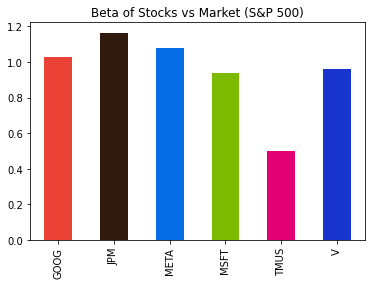

In [182]:
betas.plot(kind='bar', color=[colors[ticker] for ticker in betas.index]);
plt.title('Beta of Stocks vs Market (S&P 500)');

## b. Calcolare l’esposizione di ciascun titolo ai fattori di rischio Fama-French

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/data/F-F_Research_Data_Factors.csv'
factor_df = pd.read_csv(dataset_path, skiprows=3)

In [185]:
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [186]:
start_date = '2012-11-30'
end_date = '2022-11-30'

In [187]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

In [188]:
factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")

In [189]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start_date:end_date]
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

In [190]:
factor_df.head()

,mkt,smb,hml,rf
data,,,,
2012-12,0.0118,0.0150,0.0351,0.0001
2013-01,0.0557,0.0033,0.0096,0.0000
2013-02,0.0129,-0.0028,0.0011,0.0000
2013-03,0.0403,0.0081,-0.0019,0.0000
2013-04,0.0155,-0.0236,0.0045,0.0000


In [191]:
risky_assets = tickers
for risky_asset in risky_assets:
  asset_df = yf.download(risky_asset, start_date, end_date) 
  y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
  y.index = y.index.strftime('%Y-%m')
  y.name = 'rtn'

  ff_data = factor_df.join(y)
  ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

  import statsmodels.formula.api as smf
  ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
  print(risky_asset)
  print(ff_model.summary())

[*********************100%***********************]  1 of 1 completed
META
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     12.30
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                        20:17:28   Log-Likelihood:                 120.19
No. Observations:                 119   AIC:                            -232.4
Df Residuals:                     115   BIC:                            -221.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## c. Utilizzare il beta per calcolare il rendimento atteso annuo del titolo (utilizzare una propria previsione o stima del rendimento dell’indice S&P500.

In [192]:
betas

GOOG    1.026771
JPM     1.164685
META    1.077908
MSFT    0.939851
TMUS    0.498480
V       0.960531
Name: market, dtype: float64

In [193]:
X_12 = df['Adj Close'].rename(columns={market_benchmark:'market'}).resample('M').last()[-12:].pct_change().dropna()
benchmark_variance_12 = X_12.market.var()
risky_asset_cov_12 = X.cov().iloc[-1, :6]
betas_12 = risky_asset_cov_12 / benchmark_variance_12

In [194]:
rf_mean = factor_df['rf'][-12:].mean()
rm_mean = factor_df['mkt'][-12:].mean()

print(f"Risk Free Return: {rf_mean} | Market Return: {rm_mean}")

Risk Free Return: 0.0006749999999999999 | Market Return: -0.014908333333333334


In [195]:
expect_returns = {}
expect_returns_12 = {}

# beta calcolato su tutto il timeframe (10 anni)
for ticker, beta in betas.items():
  expect_returns[ticker] = (rf_mean + beta * (rm_mean - rf_mean)) * 12

# beta calcolato su tutto 12 mesi
for ticker, beta in betas_12.items():
  expect_returns_12[ticker] = (rf_mean + beta * (rm_mean - rf_mean)) * 12

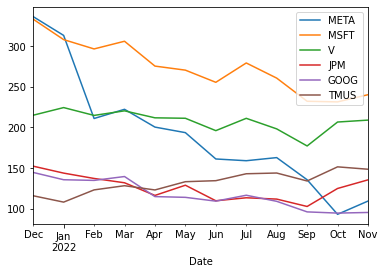

In [196]:
# Closes negli ultimi 12 mesi
stocks_close.groupby(pd.Grouper(freq='M')).last()[-12:].plot();

In [197]:
expect_returns_series = pd.Series(expect_returns)

In [198]:
pd.DataFrame([expect_returns])

,GOOG,JPM,META,MSFT,TMUS,V
0,-0.183906,-0.209696,-0.193469,-0.167652,-0.085116,-0.171519


In [199]:
pd.DataFrame([expect_returns_12])

,GOOG,JPM,META,MSFT,TMUS,V
0,-0.070329,-0.080864,-0.074235,-0.06369,-0.029976,-0.065269


# 6. Costruzione di portafoglio

## a. Costruire il portafoglio ottimale in termini di media-varianza utilizzando i primi 108 mesi di dati, sia con metodo analitico sia con metodo di simulazione, utilizzando sia i rendimenti passati sia i rendimenti attesi costruiti nella parte 5

### Metodo di simulazione

#### Rendimenti passati

In [200]:
number_of_portfolios = 40000
months_back = 108

In [201]:
monthly_simple_returns = simple_returns.groupby(pd.Grouper(freq='M')).last()
monthly_simple_returns_108 = monthly_simple_returns[:months_back]
monthly_simple_returns_108

,META,MSFT,V,JPM,GOOG,TMUS
Date,,,,,,
2012-12-31 00:00:00-05:00,0.027403,0.006026,0.019711,0.016882,0.010528,0.013252
2013-01-31 00:00:00-05:00,-0.008323,-0.014363,0.018709,-0.001697,0.002467,0.013131
2013-02-28 00:00:00-05:00,0.014142,-0.000360,-0.007693,-0.007305,0.001775,-0.009100
2013-03-31 00:00:00-04:00,-0.019548,0.008460,0.006996,-0.006489,-0.010552,0.035138
2013-04-30 00:00:00-04:00,0.029281,0.015026,0.003336,0.001840,0.006727,-0.009205
...,...,...,...,...,...,...
2021-07-31 00:00:00-04:00,-0.005637,-0.005550,-0.006171,-0.007974,-0.009664,-0.004218
2021-08-31 00:00:00-04:00,-0.003363,-0.005633,-0.009212,-0.003054,-0.000052,-0.006381
2021-09-30 00:00:00-04:00,-0.000648,-0.007324,-0.017337,-0.013619,-0.009333,-0.002654


In [202]:
means = monthly_simple_returns_108.mean()*12

In [203]:
mat_cov = monthly_simple_returns_108.cov()*12
mat_cov

,META,MSFT,V,JPM,GOOG,TMUS
META,0.006048,0.001612,0.001105,0.000630,0.001432,0.000947
MSFT,0.001612,0.002237,0.001226,0.000851,0.000823,0.000674
V,0.001105,0.001226,0.003365,0.001107,0.000879,0.000874
JPM,0.000630,0.000851,0.001107,0.002069,0.000407,0.000514
GOOG,0.001432,0.000823,0.000879,0.000407,0.003007,0.000702
TMUS,0.000947,0.000674,0.000874,0.000514,0.000702,0.003666


In [204]:
returns = monthly_simple_returns_108

In [205]:
rf = factor_df[:108]['rf'].mean() * 12
rf

0.006022222222222222

In [206]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights = np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)

    annualized_return = np.sum(means * weights)

    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)

    sharpe_ratio = (annualized_return - rf) / portfolio_standard_deviation

    sharpe_ratios.append(sharpe_ratio)

In [207]:
portfolio_returns = np.array(portfolio_returns)
portofolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

In [208]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
lowest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmin()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

In [209]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')

Lowest risk
Return                                      -0.015082
Risk                                          0.03375
Sharpe                                      -0.625328
Weights    [0.002, 0.175, 0.037, 0.372, 0.251, 0.162]
Name: 20078, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']

Highest return
Return                                      0.008734
Risk                                        0.049561
Sharpe                                      0.054725
Weights    [0.417, 0.51, 0.004, 0.009, 0.034, 0.026]
Name: 29163, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']

Highest Sharpe ratio
Return                                      0.008677
Risk                                        0.047643
Sharpe                                      0.055726
Weights    [0.417, 0.208, 0.01, 0.003, 0.034, 0.328]
Name: 4469, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']



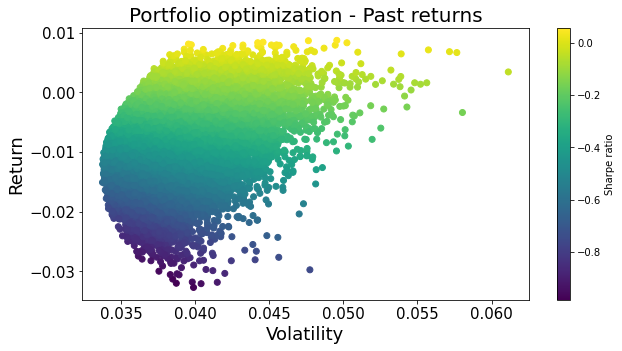

In [210]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Past returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

#### Rendimenti attesi

In [211]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []
rf_exp = -0.005

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights =np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)

    annualized_return = np.sum(expect_returns_series * weights)

    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratio = (annualized_return - rf_exp) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

In [212]:
portfolio_returns = np.array(portfolio_returns)
portofolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

In [213]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

In [214]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk_exp.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret_exp.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe_exp.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')


Lowest risk
Return                                     -0.160441
Risk                                        0.033754
Sharpe                                     -4.605064
Weights    [0.023, 0.194, 0.049, 0.35, 0.216, 0.169]
Name: 15541, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']

Highest return
Return                                     -0.109621
Risk                                        0.045006
Sharpe                                     -2.324569
Weights    [0.045, 0.021, 0.04, 0.074, 0.735, 0.083]
Name: 12211, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']

Highest Sharpe ratio
Return                                     -0.109621
Risk                                        0.045006
Sharpe                                     -2.324569
Weights    [0.045, 0.021, 0.04, 0.074, 0.735, 0.083]
Name: 12211, dtype: object
['META', 'MSFT', 'V', 'JPM', 'GOOG', 'TMUS']



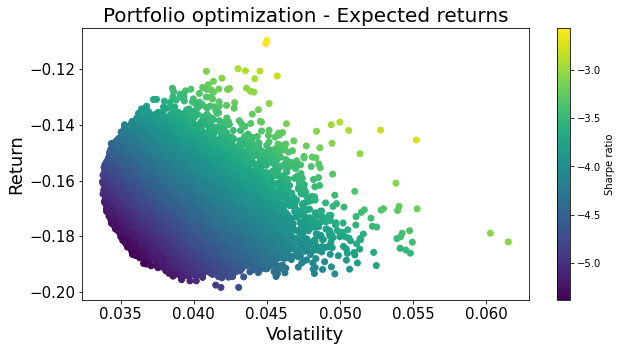

In [215]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Expected returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

### Metodo Analitico

In [216]:
import numpy as np
import scipy.optimize as sco

In [217]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [218]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constraints = ({'type': 'eq', 
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                       {'type': 'eq', 
                        'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess, 
                                           args=args, method='SLSQP', 
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

In [219]:
# rtns_range = np.linspace(lowest_return.Return, highest_return.Return, 200)
rtns_range = np.linspace(-0.22, 0.32, 200)

In [220]:
n_days = 252
n_port = 10 ** 5
n_assets = len(stocks_close.columns)

returns_df = stocks_close.pct_change().dropna()
avg_returns = returns_df.mean() * n_days
cov_mat = returns_df.cov() * n_days

np.random.seed(42)
weights = np.random.random(size=(n_port, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [221]:
avg_returns

META    0.209443
MSFT    0.276086
V       0.210895
JPM     0.184017
GOOG    0.206689
TMUS    0.255437
dtype: float64

In [222]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

In [223]:
vols_range = [x['fun'] for x in efficient_portfolios]

In [224]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [225]:
portf_sharpe_ratio

array([1.0453743 , 1.12309672, 0.9338109 , ..., 1.08646906, 1.08688911,
       1.01270791])

In [226]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

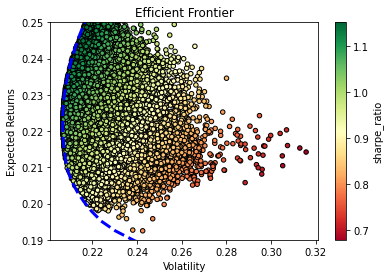

In [227]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')

plt.ylim(0.19,0.25)
plt.show()

In [228]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                 'Volatility': min_vol_portf_vol,
                 'Sharpe Ratio': (min_vol_portf_rtn / 
                                  min_vol_portf_vol)}

min_vol_portf

{'Return': 0.22231155778894476,
 'Volatility': 0.20671214411016106,
 'Sharpe Ratio': 1.0754644278203145}

In [229]:
# Sommario dei risultati
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(risky_assets, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 22.23% Volatility: 20.67% Sharpe Ratio: 107.55% 
Weights
META: 0.33% MSFT: 12.26% V: 21.91% JPM: 24.27% GOOG: 17.26% TMUS: 23.98% 

Ricerca del portafoglio ottimale (massimo Sharpe ratio)

In [230]:
# Funzione obiettivo
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

#### Ricerca del portafoglio ottimale

In [231]:
n_assets = len(avg_returns)
RF_RATE = 0

args = (avg_returns, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [232]:
max_sharpe_portf_w = max_sharpe_portf['x']
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            avg_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w, 
                                                avg_returns, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf['fun']}
max_sharpe_portf

{'Return': 0.2553574622487173,
 'Volatility': 0.22079876913001037,
 'Sharpe Ratio': 1.1565166928007562}

In [233]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')

for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(risky_assets, max_sharpe_portf_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 25.54% Volatility: 22.08% Sharpe Ratio: 115.65% 
Weights
META: 0.00% MSFT: 48.02% V: 12.48% JPM: 6.21% GOOG: 0.00% TMUS: 33.29% 

## b. Calcolare il beta del portafoglio rispetto al mercato

In [234]:
highest_sharpe

Return                                     -0.109621
Risk                                        0.045006
Sharpe                                     -2.324569
Weights    [0.045, 0.021, 0.04, 0.074, 0.735, 0.083]
Name: 12211, dtype: object

In [235]:
print('\nWeights')
for x, y in zip(risky_assets, max_sharpe_portf_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)


Weights
META: 0.00% MSFT: 48.02% V: 12.48% JPM: 6.21% GOOG: 0.00% TMUS: 33.29% 

In [236]:
max_sharpe_portf_w

array([3.16475934e-18, 4.80181481e-01, 1.24768881e-01, 6.21280438e-02,
       0.00000000e+00, 3.32921595e-01])

In [237]:
max_sharpe_portf["Weights"] = np.round(max_sharpe_portf_w, 4)
opt_portf = pd.Series(max_sharpe_portf)

In [238]:
print('β:', np.dot(opt_portf.Weights, betas))

β: 1.071930262611666


- β < 0 – Indica che l’azione tenderà ad avere un movimento opposto rispetto a quello del mercato.
- 0 < β < 1 – Indica che l’azione tenderà ad avere un movimento meno proporzionale rispetto a quello dell’indice di riferimento. L’azione verrà detta “difensiva”.
- β = 1 – Indica che l’azione tenderà ad avere un movimento in linea con quello del mercato.
- β > 1 – Indica che l’azione amplifica i movimenti del mercato. L’azione verrà detta “aggressiva” e verrà considerata più rischiosa.

## c. Confrontare il rendimento del portafoglio ottimale con quello effettivo. Per “portafoglio effettivo” si intende un portafoglio composto dai sei titoli oggetto di analisi con peso uguale fra di loro.

In [239]:
print("OPT Portfolio:")
opt_portf

OPT Portfolio:


Return                                            0.255357
Volatility                                        0.220799
Sharpe Ratio                                      1.156517
Weights         [0.0, 0.4802, 0.1248, 0.0621, 0.0, 0.3329]
dtype: object

In [240]:
weights = np.array([1/6 for i in range(6)])

annualized_return = np.sum(means * weights)
portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
portfolio_standard_deviation = np.sqrt(portfolio_variance)
sharpe_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [241]:
portfolio_metrics = [annualized_return, portfolio_variance, sharpe_ratio, np.round(weights,4)]
opt_portf_eff = pd.DataFrame(portfolio_metrics).T
opt_portf_eff.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
opt_portf_eff = opt_portf_eff.squeeze()

In [242]:
print(f"- OPT Portfolio return: {opt_portf.Return}/n")
print(f"- EFF Portfolio return: {opt_portf_eff.Return}")

- OPT Portfolio return: 0.2553574622487173/n
- EFF Portfolio return: -0.00861300426483514
